1. **What is Simple Linear Regression?**

**Simple Linear Regression**

- Simple Linear Regression is a statistical method used to model the relationship between two variables: one independent variable (X) and one dependent variable (Y).
- The goal is to find the best-fitting straight line that predicts the value of Y based on X.
- The line is represented by the equation:
  
  Y = β₀ + β₁X + ε

  - β₀ → Intercept (value of Y when X = 0)
  - β₁ → Slope (change in Y for each unit change in X)
  - ε → Error term (difference between the predicted and actual value)

- It assumes a linear relationship between the variables.
- The best-fitting line is found by minimizing the sum of squared errors (differences between predicted and actual Y values).
- It is commonly used for prediction, trend analysis, and understanding relationships between variables.

2. **What are the key assumptions of Simple Linear Regression?**


**Key Assumptions of Simple Linear Regression**

- **Linearity**: The relationship between the independent variable (X) and dependent variable (Y) is linear.

- **Independence**: The observations are independent of each other; there is no correlation between residuals.

- **Homoscedasticity**: The variance of the error terms (residuals) is constant across all levels of the independent variable.

- **Normality of Residuals**: The residuals (errors) are normally distributed, especially important for hypothesis testing and confidence intervals.

- **No Multicollinearity**: Since simple linear regression involves only one independent variable, this assumption is automatically satisfied.

- **No Autocorrelation**: Residuals are not correlated with each other, which is especially important in time series data.


3. **What is heteroscedasticity, and why is it important to address in regression models?**

**Heteroscedasticity**

- Heteroscedasticity occurs when the variance of the error terms (residuals) is not constant across all levels of the independent variable.
- In other words, the spread or variability of residuals increases or decreases with the values of X.
- This violates the homoscedasticity assumption of linear regression.

**Why It Is Important to Address**

- It leads to inefficient estimates of regression coefficients.
- Standard errors become unreliable, causing hypothesis tests (t-tests, F-tests) to give incorrect conclusions.
- Confidence intervals and p-values may be misleading.
- The model’s predictive performance may be poor when applied to new data.

**How to Detect and Fix**

- **Detection**: Plot residuals vs. predicted values, use tests like Breusch-Pagan or White’s test.
- **Fixing**:
  - Transform variables (e.g., log, square root).
  - Use weighted least squares regression.
  - Use robust standard errors that handle heteroscedasticity.



4. **What is Multiple Linear Regression?**

**Multiple Linear Regression**

- Multiple Linear Regression (MLR) is an extension of Simple Linear Regression that models the relationship between one dependent variable (Y) and two or more independent variables (X₁, X₂, ..., Xₙ).
- It is used to understand how multiple factors simultaneously affect a response variable.

**Equation**

  Y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ε

  - β₀ → Intercept (value of Y when all X’s are 0)
  - β₁, β₂, ..., βₙ → Coefficients representing the effect of each independent variable
  - ε → Error term (difference between predicted and actual value)

**Key Points**

- Helps analyze the combined influence of several variables on a target variable.
- Assumes a linear relationship between dependent and independent variables.
- Coefficients are estimated using the method of least squares.
- Commonly used in prediction, forecasting, and determining feature importance.


5. **What is polynomial regression, and how does it differ from linear
regression?**

**Polynomial Regression**

- Polynomial Regression is a type of regression that models the relationship between the independent variable (X) and the dependent variable (Y) as an nth-degree polynomial.
- It allows capturing non-linear relationships by adding higher-order terms (X², X³, etc.) to the model.

**Equation**

  Y = β₀ + β₁X + β₂X² + β₃X³ + ... + βₙXⁿ + ε

  - β₀ → Intercept  
  - β₁, β₂, ..., βₙ → Coefficients for each polynomial term  
  - ε → Error term  

**Difference from Linear Regression**

- **Linear Regression** assumes a straight-line relationship between X and Y.  
  (Y = β₀ + β₁X + ε)

- **Polynomial Regression** models curved relationships by including powers of X.  
  (Y = β₀ + β₁X + β₂X² + ...)

- While Polynomial Regression is non-linear in terms of the relationship between variables, it is still **linear in coefficients**, meaning it can be solved using linear regression techniques.

**Use Case**

- Useful when data shows a curved trend that a straight line cannot fit properly.


Intercept (β₀): 0.17999999999999794
Slope (β₁): 1.9800000000000004


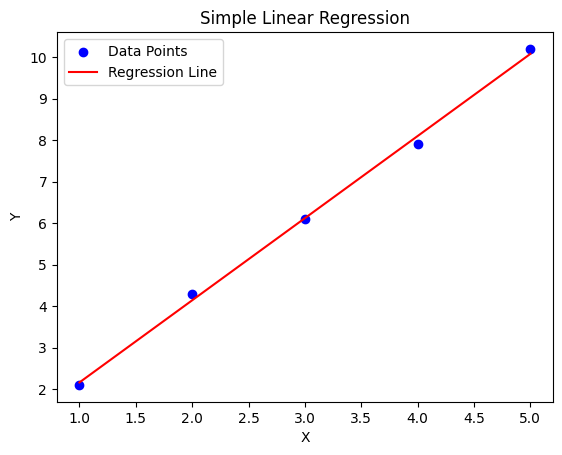

In [1]:
# 6. Implement a Python program to fit a Simple Linear Regression model to
# the following sample data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
# Plot the regression line over the data points.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Predict values
Y_pred = model.predict(X)

# Print coefficients
print("Intercept (β₀):", model.intercept_)
print("Slope (β₁):", model.coef_[0])

# Plot data points and regression line
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

In [2]:
# 7. Fit a Multiple Linear Regression model on this sample data:
# ● Area = [1200, 1500, 1800, 2000]
# ● Rooms = [2, 3, 3, 4]
# ● Price = [250000, 300000, 320000, 370000]
# Check for multicollinearity using VIF and report the results

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Sample data
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}

df = pd.DataFrame(data)

# Define independent and dependent variables
X = df[['Area', 'Rooms']]
y = df['Price']

# Fit Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Display coefficients
print("Intercept (β₀):", model.intercept_)
print("Coefficients (β):", dict(zip(X.columns, model.coef_)))

# Calculate VIF to check multicollinearity
X_with_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(X_with_const.shape[1])]

print("\nVariance Inflation Factor (VIF) Results:")
print(vif_data)

Intercept (β₀): 103157.89473684214
Coefficients (β): {'Area': np.float64(63.15789473684211), 'Rooms': np.float64(34736.842105263146)}

Variance Inflation Factor (VIF) Results:
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


* VIF (Variance Inflation Factor) measures how much the variance of a regression coefficient is inflated due to multicollinearity.

* A VIF > 5 or 10 usually indicates high multicollinearity, meaning the independent variables are highly correlated.

* In this dataset, since “Area” and “Rooms” may increase together, the VIF values might be higher.

Intercept (β₀): 0.06000000000000938
Coefficients (β): [0.   1.94 0.2 ]


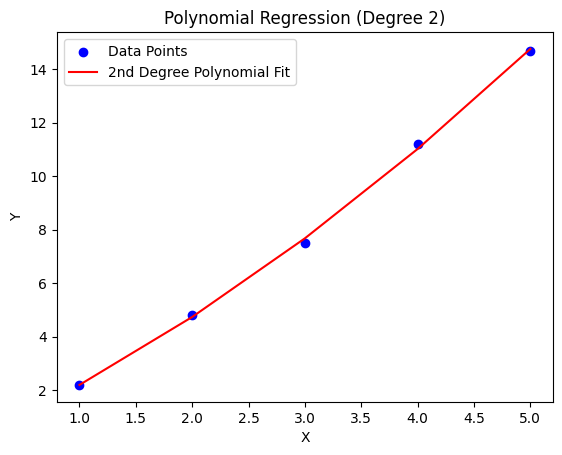

In [3]:
# 8. Implement polynomial regression on the following data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
# Fit a 2nd-degree polynomial and plot the resulting curve

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict values
Y_pred = model.predict(X_poly)

# Print coefficients
print("Intercept (β₀):", model.intercept_)
print("Coefficients (β):", model.coef_)

# Plot data points and polynomial curve
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='2nd Degree Polynomial Fit')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()


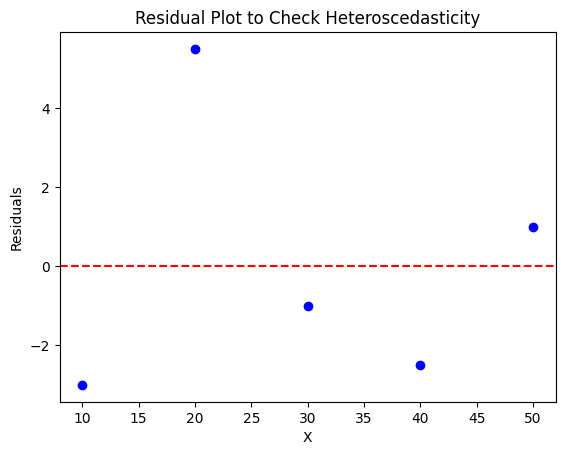

In [4]:
# 9.  Create a residuals plot for a regression model trained on this data:
# ● X = [10, 20, 30, 40, 50]
# ● Y = [15, 35, 40, 50, 65]
# Assess heteroscedasticity by examining the spread of residuals.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit a simple linear regression model
model = LinearRegression()
model.fit(X, Y)

# Predict values
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Plot residuals
plt.scatter(X, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residual Plot to Check Heteroscedasticity")
plt.show()

# Interpretation:
# - If the residuals are randomly scattered around the horizontal line (y=0)
#   with equal spread, it indicates homoscedasticity.
# - If the residuals fan out or form a pattern (e.g., increasing spread as X increases),
#   it suggests heteroscedasticity.

10. **Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.**

**Steps to Address Heteroscedasticity and Multicollinearity in a Regression Model**

**1. Addressing Heteroscedasticity**

- **Transform the Dependent Variable:**  
  Apply transformations such as log, square root, or Box-Cox on the target variable (price) to stabilize variance.  
  Example: log(Price) instead of Price.

- **Weighted Least Squares (WLS):**  
  Assign weights inversely proportional to the variance of the residuals, giving less influence to data points with higher variance.

- **Robust Standard Errors:**  
  Use heteroscedasticity-robust (HC) standard errors to make hypothesis testing more reliable even when variance is not constant.

- **Check Model Specification:**  
  Ensure that all relevant variables are included and the functional form of the model is correct. Missing variables or wrong functional forms can cause heteroscedasticity.

---

**2. Addressing Multicollinearity**

- **Check Correlation Matrix or VIF (Variance Inflation Factor):**  
  Identify pairs of features that are highly correlated (VIF > 5 or 10).

- **Remove or Combine Correlated Features:**  
  Drop one of the correlated predictors or combine them into a single feature (e.g., total_rooms = bedrooms + bathrooms).

- **Feature Engineering or Regularization:**  
  - Use **Ridge Regression (L2 regularization)** to reduce the effect of multicollinearity by shrinking coefficients.
  - Use **Lasso Regression (L1 regularization)** for feature selection by setting less important coefficients to zero.

- **Principal Component Analysis (PCA):**  
  Transform correlated features into a smaller set of uncorrelated components.

---

**3. Model Validation**

- Split data into training and testing sets or use cross-validation.
- Evaluate model performance using metrics such as RMSE or MAE.
- Plot residuals again after adjustments to confirm reduction in heteroscedasticity.
- Recompute VIF values to ensure multicollinearity has been minimized.

---

**Outcome**

After these steps, the regression model will have:
- More reliable coefficient estimates.
- Stable variance across residuals.
- Better generalization and interpretability for predicting house prices.
